# Calculating Pi 

This notebook presents a few different solutions to the challenge at the end of the matplotlib session of the Sheffield SunPy Workshop. The challenge was to calculate $\pi$ using the monte-carlo method of creating a random point in a unit square and calculating the ratio of points that fall inside the unit circle to the total number of randomly generated points.

The second part of the challenge was to animate this calculation of $\pi$ using `matplotlib`.

## Calculating $\pi$ using a function

With the end goal of animating this process, we start by calculating $\pi$ using a function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

The basic components of this function are the generation of a random `(x, y)` coordinate, calculating the distance of that point away from the origin and counting if this point falls inside or outside the unit circle.

To keep the total count and inside count variables availible we pass them into the function and return the modified ones from the function.

In [2]:
# Initilise our counts
count = 0.
inside = 0.

def pitest(count, inside):
    # Create the coordinate
    xtemp = np.random.random(1)
    ytemp = np.random.random(1)
    
    # Calculate the distance to the origin
    r = np.sqrt(xtemp**2 + ytemp**2)

    # Count this if it is inside the circle.
    if r< 1:
        inside += 1

    count += 1
    return count, inside

To execute this we run the function multiple times. *Note: we do not need to calculate the total count like this for this case, we could just know the number of times the loop runs, but the way it is done is useful for animation later.*

In [3]:
for i in range(10000):
    count, inside = pitest(count, inside)
print (inside/count)*4.

3.1344


### A note on speed

As already mentioned, in isolation this method is not optimal. As demonstrated below it takes quite a long time to calculate $\pi$.

In [4]:
%%timeit

count = 0.
inside = 0.
for i in range(1000000):
    count, inside = pitest(count, inside)
print (inside/count)*4.

3.141376
3.142904
3.144076
3.143844
1 loops, best of 3: 13.2 s per loop


Generally in scientific Python applications you do not need to iterate like this you can infact calculate $\pi$ by the monte carlo method, using nothing but NumPy arrays:

In [7]:
points = np.random.random([2,1000000])
inside = np.count_nonzero(np.sqrt(points[0,:]**2 + points[1,:]**2) < 1)
pi = (float(inside)/points.shape[1])*4
pi

3.139848

In [8]:
%%timeit
points = np.random.random([2,1000000])
inside = np.count_nonzero(np.sqrt(points[0,:]**2 + points[1,:]**2) < 1)
pi = (float(inside)/points.shape[1])*4

10 loops, best of 3: 39.6 ms per loop


As can be seen, it is substantially faster to calculate $\pi$ using NumPy arrays.

# One with Animation

The second part of the challenge was to animate the estimator, to do this we modify our function a little:

In [10]:
%matplotlib nbagg

This version of the function uses the `global` statement to keep the modified counters availible, this is because it is not possible to capture any returned values from a `matplotlib` animation function.

This time we also add some plotting commands, but otherwise the function remains the same.

In [11]:
count = 0.
inside = 0.
def pitest(i, ax):
    global count, inside
    xtemp = np.random.random(1)
    ytemp = np.random.random(1)
       
    r = np.sqrt(xtemp**2 + ytemp**2)

    if r< 1:
        inside += 1
        point, = ax.plot(xtemp, ytemp, 'ob')
    else:
        point, = ax.plot(xtemp, ytemp, 'or')

    count += 1
    
    ax.set_title(r"Current Estimation of $\pi$ is {:3.10f}".format((inside/count)*4.))

Now we setup the plot, add a line showing the unit circle, and animate the function above:

<IPython.core.display.Javascript object>


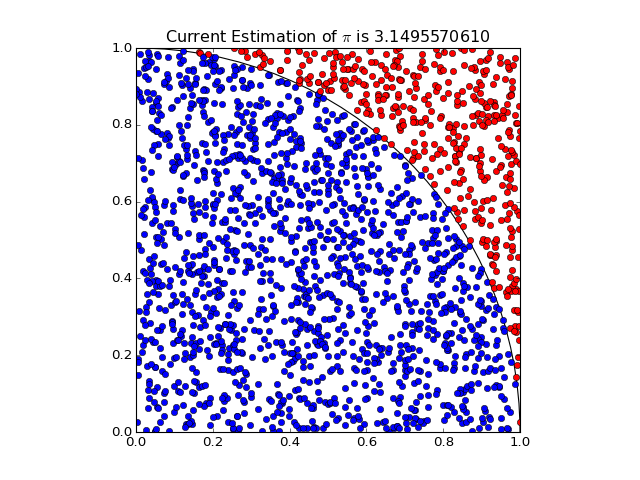

In [12]:
fig, ax = plt.subplots()

# Plot the R = 1 line
circ = plt.Circle((0,0), radius=1, facecolor='none')
ax.add_artist(circ)

point, = ax.plot(0,0)
ani = anim.FuncAnimation(fig, pitest, fargs=(ax,), interval=5)


ax.axis('image')
ax.axis([0,1,0,1])
plt.show()